In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

## 1. 
Data Exploration:

a. Load the dataset and perform exploratory data analysis (EDA).

b. Examine the features, their types, and summary statistics.

c. Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.

d. Analyze any patterns or correlations observed in the data.


In [2]:
df = pd.read_csv('Titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.duplicated().any()

False

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
sex = pd.get_dummies(df['Sex'], drop_first=True, dtype='int')
embark = pd.get_dummies(df['Embarked'], drop_first=True, dtype='int')

In [8]:
df.drop(['Sex','Embarked','Name','Ticket','Cabin','Fare'],axis=1,inplace=True)

In [9]:
df = pd.concat([df,sex,embark],axis=1)
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,male,Q,S
0,1,0,3,22.000000,1,0,1,0,1
1,2,1,1,38.000000,1,0,0,0,0
2,3,1,3,26.000000,0,0,0,0,1
3,4,1,1,35.000000,1,0,0,0,1
4,5,0,3,35.000000,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,1,0,1
887,888,1,1,19.000000,0,0,0,0,1
888,889,0,3,29.699118,1,2,0,0,1
889,890,1,1,26.000000,0,0,1,0,0


<Axes: ylabel='Count'>

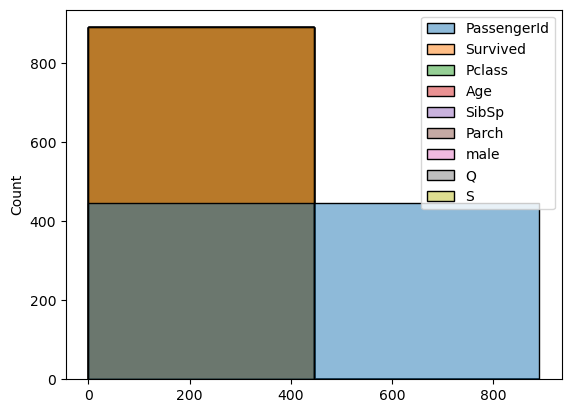

In [10]:
sns.histplot(df,bins=2)

<Axes: xlabel='Survived', ylabel='Count'>

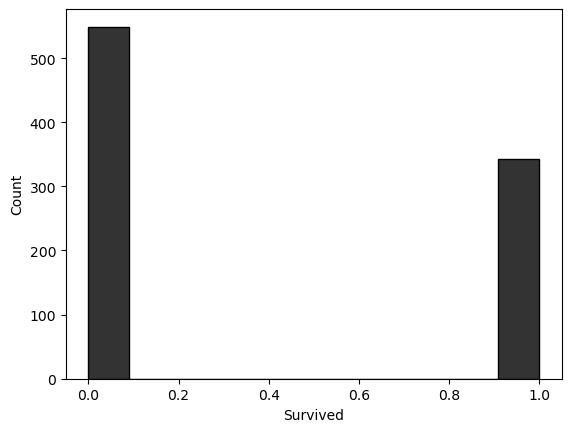

In [11]:
sns.histplot(df['Survived'],color='black',alpha=0.8)

<Axes: xlabel='Age', ylabel='Parch'>

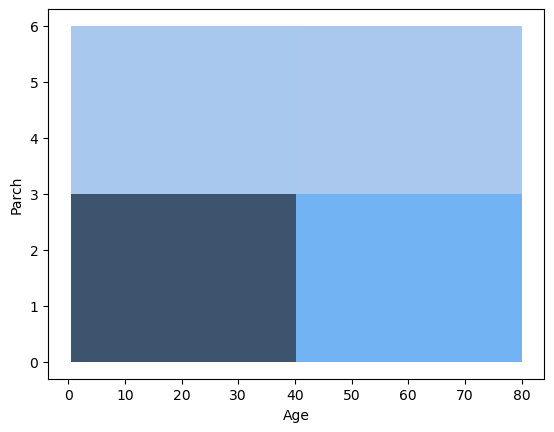

In [12]:
sns.histplot(data=df,x=df['Age'],y=df['Parch'],bins=2)

<Axes: xlabel='SibSp', ylabel='Pclass'>

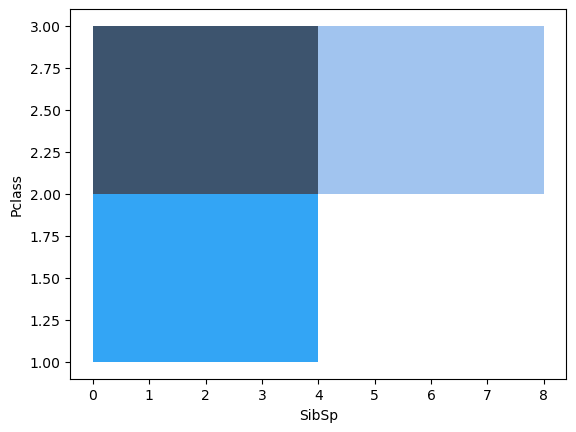

In [13]:
sns.histplot(data=df,x=df['SibSp'],y=df['Pclass'],bins=2)

<Axes: xlabel='SibSp', ylabel='Pclass'>

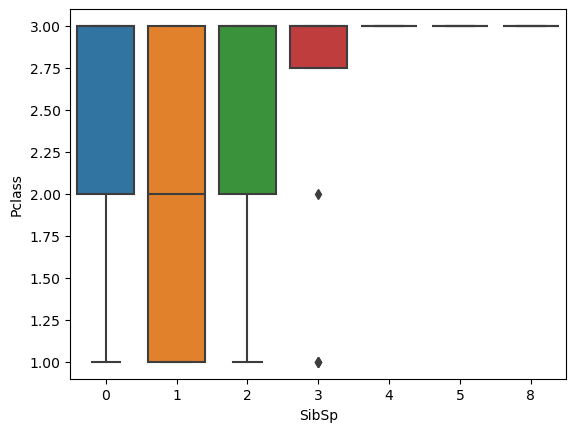

In [14]:
sns.boxplot(data=df,x='SibSp',y='Pclass')

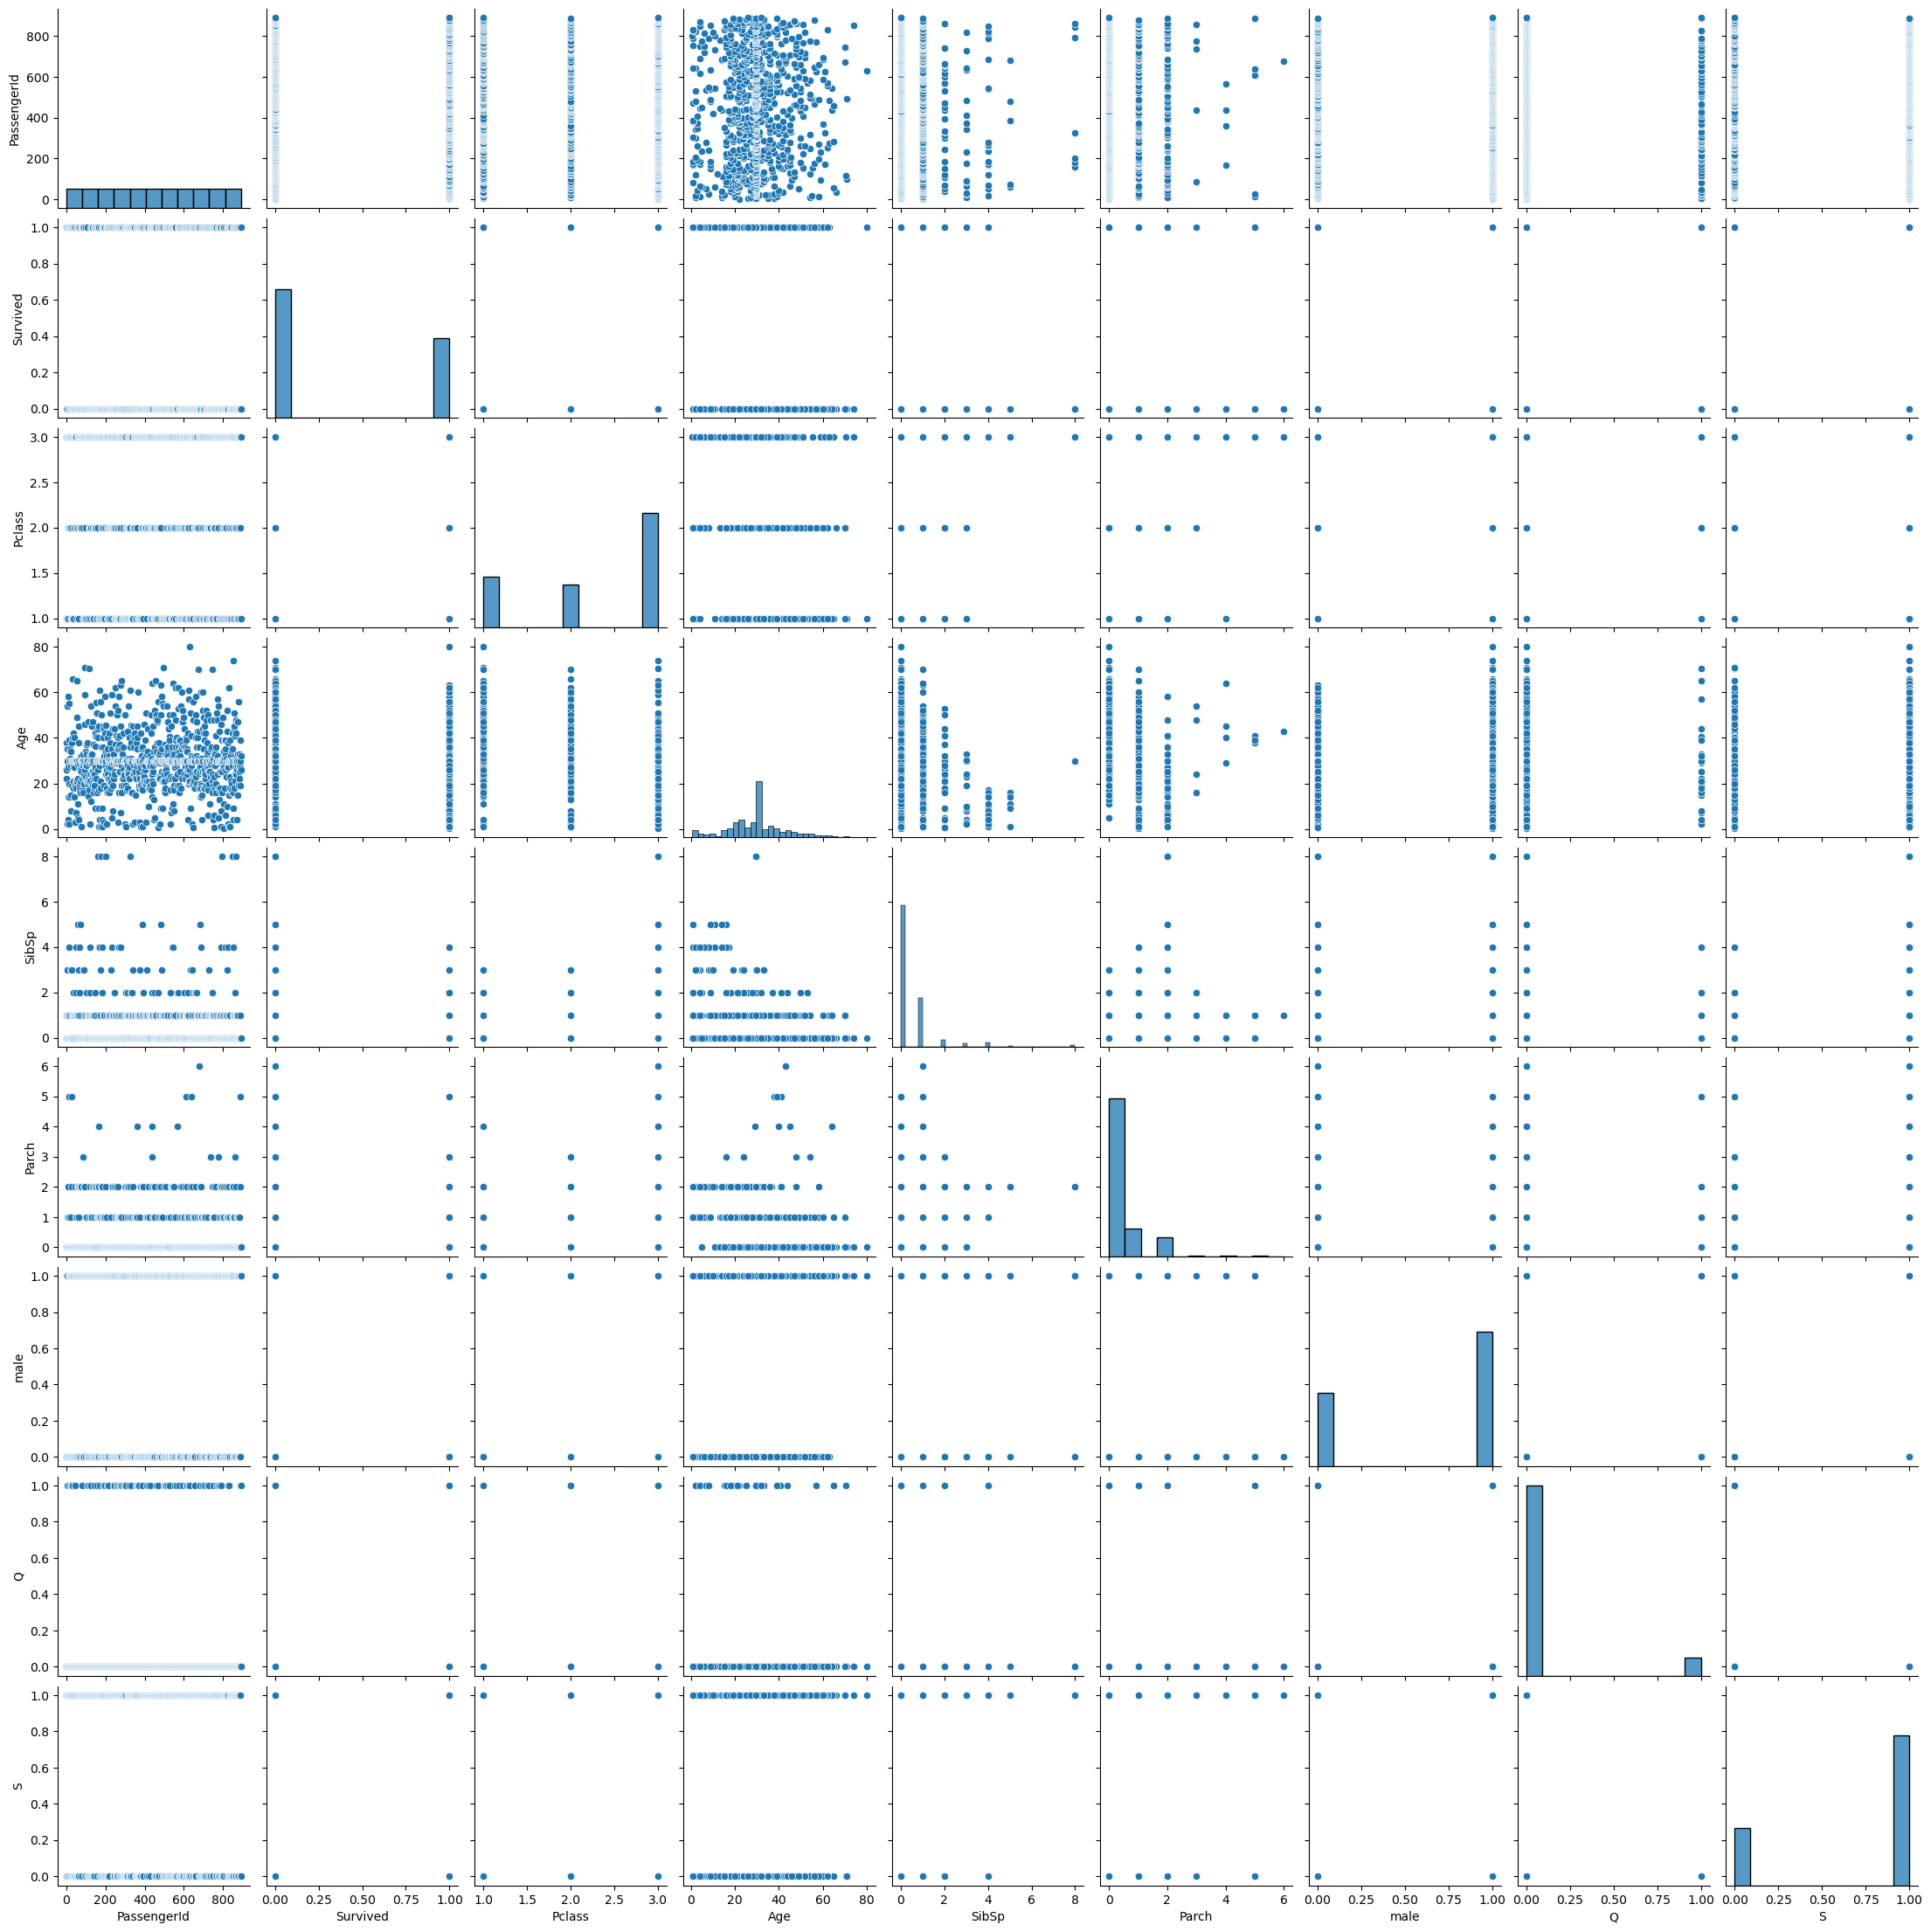

In [15]:
sns.pairplot(data = df)

## 2. 
Data Preprocessing:

a. Handle missing values (e.g., imputation).

b. Encode categorical variables


In [16]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
male           0
Q              0
S              0
dtype: int64

In [17]:
# encoded above
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,male,Q,S
0,1,0,3,22.000000,1,0,1,0,1
1,2,1,1,38.000000,1,0,0,0,0
2,3,1,3,26.000000,0,0,0,0,1
3,4,1,1,35.000000,1,0,0,0,1
4,5,0,3,35.000000,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,1,0,1
887,888,1,1,19.000000,0,0,0,0,1
888,889,0,3,29.699118,1,2,0,0,1
889,890,1,1,26.000000,0,0,1,0,0


## 3. 
Model Building:

a. Build a logistic regression model using appropriate libraries (e.g., scikit-learn).

b. Train the model using the training data.


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [19]:
target = df[['Survived']]
feature = df.drop('Survived',axis = 1)

In [20]:
x_train,x_test,y_train,y_test = train_test_split(feature,target,train_size=0.75,random_state=100)

In [21]:
log_model = LogisticRegression()

In [22]:
log_model.fit(x_train,y_train)

LogisticRegression()

In [23]:
y_pred = log_model.predict(x_test)

In [24]:
accuracy_score(y_test,y_pred)

0.7713004484304933

<Axes: xlabel='Survived'>

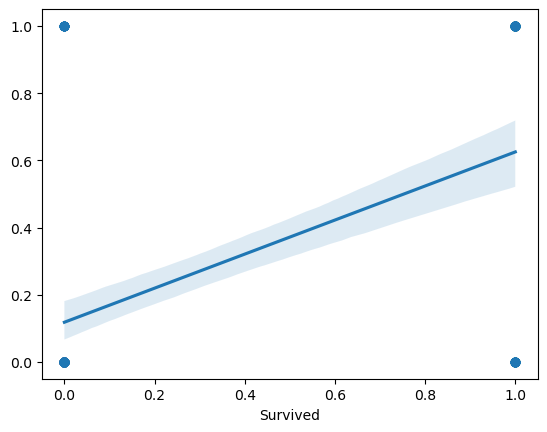

In [25]:
sns.regplot(data = df, x=y_test, y=y_pred)

## 4.
Model Evaluation:

a. Evaluate the performance of the model on the testing data using accuracy, precision, recall, F1-score, and ROC-AUC score.

b. Visualize the ROC curve.


In [26]:
from sklearn.metrics import roc_auc_score, classification_report, roc_curve,confusion_matrix

In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.88      0.81       127
           1       0.80      0.62      0.70        96

    accuracy                           0.77       223
   macro avg       0.78      0.75      0.76       223
weighted avg       0.78      0.77      0.77       223



In [28]:
confusion_matrix(y_test,y_pred)

array([[112,  15],
       [ 36,  60]], dtype=int64)

<Axes: >

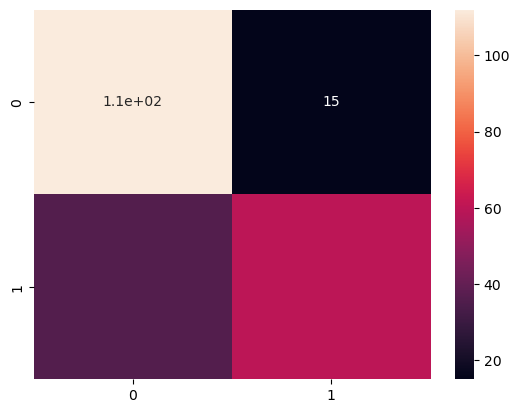

In [29]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [30]:
log_proba = log_model.predict_proba(x_test)[::,1]

In [31]:
auc = roc_auc_score(y_test,log_proba)
auc

0.8113517060367453

In [32]:
fpr, tpr, thr = roc_curve(y_test,log_proba)

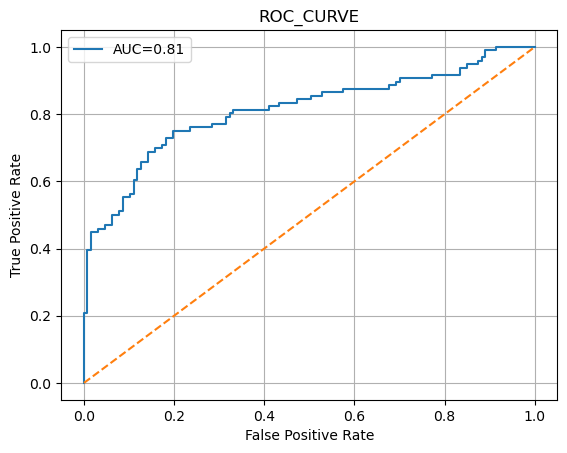

In [33]:
plt.plot(fpr,tpr,label=f'AUC={auc:.2}')
plt.plot([0,1],[0,1],linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_CURVE')
plt.legend()
plt.grid(True)

# 

## 5. 
Interpretation:

a. Interpret the coefficients of the logistic regression model.

b. Discuss the significance of features in predicting the target variable (survival probability in this case).


In [34]:
log_model.coef_

array([[ 8.14300214e-04, -6.16811593e-01,  3.26252793e-03,
        -1.25741375e-02, -2.45971961e-01, -2.59926542e+00,
        -3.00427608e-02,  1.14374291e-01]])

In [35]:
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,male,Q,S
0,1,0,3,22.000000,1,0,1,0,1
1,2,1,1,38.000000,1,0,0,0,0
2,3,1,3,26.000000,0,0,0,0,1
3,4,1,1,35.000000,1,0,0,0,1
4,5,0,3,35.000000,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,1,0,1
887,888,1,1,19.000000,0,0,0,0,1
888,889,0,3,29.699118,1,2,0,0,1
889,890,1,1,26.000000,0,0,1,0,0


## 
Answer b.

The target(survival in this case) is depended on Pclass, Age, SibSp, and Parch from which we trained the data by giving
x_train, y_train, x_test to model to predict using Logistic Regression model.

# Logistic Regression(Testing Data)

In [36]:
df1 = pd.read_csv('Titanic_test.csv')
df1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [37]:
df1.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [38]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [39]:
df1.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [40]:
df1['Age'] = df1['Age'].fillna(df1['Age'].mean())
df1.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [41]:
sex = pd.get_dummies(df1['Sex'], drop_first=True, dtype='int')
embark = pd.get_dummies(df1['Embarked'], drop_first=True, dtype='int')

In [42]:
df1.drop(['Sex','Embarked','Name','Ticket','Cabin','Fare'],axis=1,inplace=True)
df1

,PassengerId,Pclass,Age,SibSp,Parch
0,892,3,34.50000,0,0
1,893,3,47.00000,1,0
2,894,2,62.00000,0,0
3,895,3,27.00000,0,0
4,896,3,22.00000,1,1
...,...,...,...,...,...
413,1305,3,30.27259,0,0
414,1306,1,39.00000,0,0
415,1307,3,38.50000,0,0
416,1308,3,30.27259,0,0


In [43]:
df1 = pd.concat([df1,sex,embark],axis=1)
df1

,PassengerId,Pclass,Age,SibSp,Parch,male,Q,S
0,892,3,34.50000,0,0,1,1,0
1,893,3,47.00000,1,0,0,0,1
2,894,2,62.00000,0,0,1,1,0
3,895,3,27.00000,0,0,1,0,1
4,896,3,22.00000,1,1,0,0,1
...,...,...,...,...,...,...,...,...
413,1305,3,30.27259,0,0,1,0,1
414,1306,1,39.00000,0,0,0,0,0
415,1307,3,38.50000,0,0,1,0,1
416,1308,3,30.27259,0,0,1,0,1


<Axes: xlabel='Age', ylabel='SibSp'>

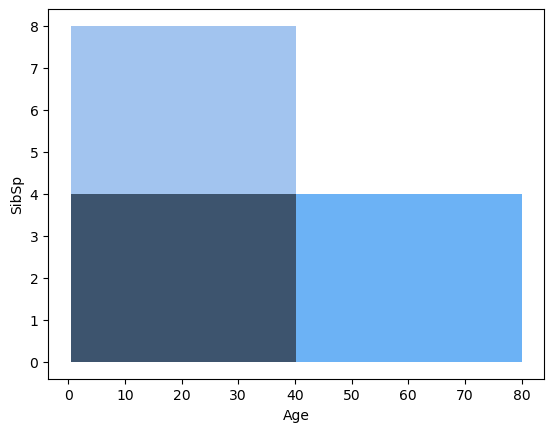

In [44]:
sns.histplot(data=df1,x=df['Age'],y=df['SibSp'],bins=2)

<Axes: xlabel='Pclass', ylabel='Count'>

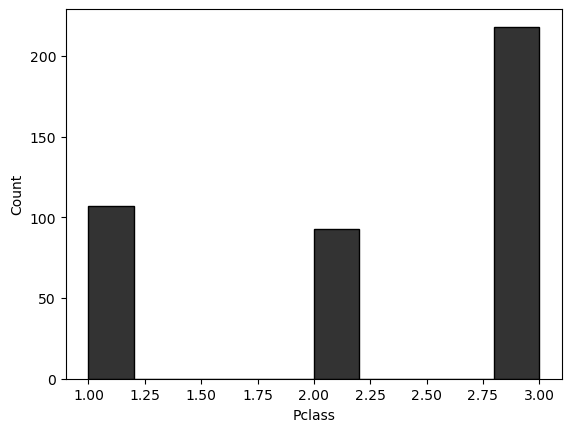

In [45]:
sns.histplot(df1['Pclass'],color='black',alpha=0.8)

<Axes: ylabel='Count'>

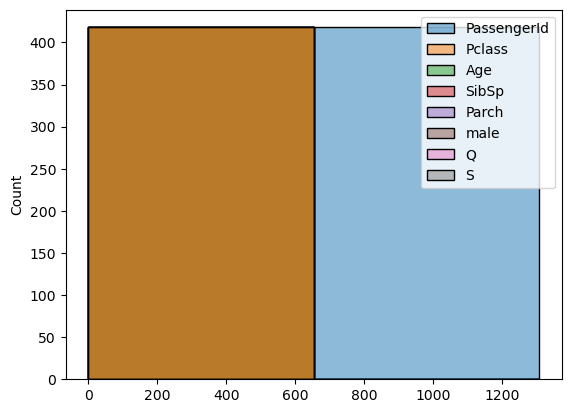

In [46]:
sns.histplot(df1,bins=2)

In [47]:
df1.isnull().sum()

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
male           0
Q              0
S              0
dtype: int64

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [66]:
df1.head()

,PassengerId,Pclass,Age,SibSp,Parch,male,Q,S
0,892,3,34.5,0,0,1,1,0
1,893,3,47.0,1,0,0,0,1
2,894,2,62.0,0,0,1,1,0
3,895,3,27.0,0,0,1,0,1
4,896,3,22.0,1,1,0,0,1


In [67]:
target = df1[['Parch']]
feature = df1.drop('Parch',axis = 1)

In [68]:
x_train,x_test,y_train,y_test = train_test_split(feature,target,train_size=0.75,random_state=100)

In [69]:
log_reg = LogisticRegression()

In [70]:
log_reg.fit(x_train,y_train)

LogisticRegression()

In [71]:
y_pred1 = log_reg.predict(x_test)

In [72]:
accuracy_score(y_test,y_pred1)

0.7428571428571429

<Axes: xlabel='Parch'>

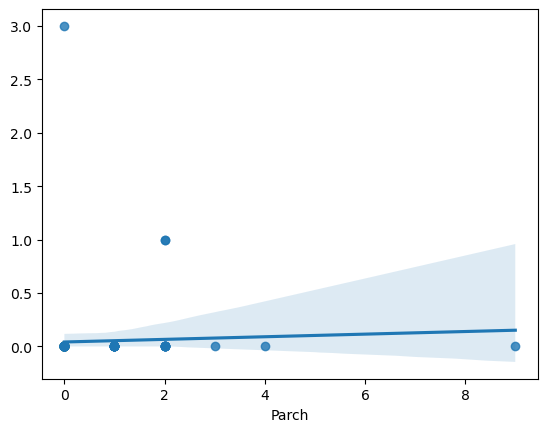

In [73]:
sns.regplot(data=df1,x=y_test,y=y_pred1)

In [74]:
from sklearn.metrics import roc_auc_score, classification_report, roc_curve,confusion_matrix

In [75]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.76      0.99      0.86        79
           1       0.00      0.00      0.00        13
           2       0.00      0.00      0.00        10
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1

    accuracy                           0.74       105
   macro avg       0.13      0.16      0.14       105
weighted avg       0.58      0.74      0.65       105



In [76]:
confusion_matrix(y_test,y_pred1)

array([[78,  0,  0,  1,  0,  0],
       [13,  0,  0,  0,  0,  0],
       [ 8,  2,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0]], dtype=int64)

<Axes: >

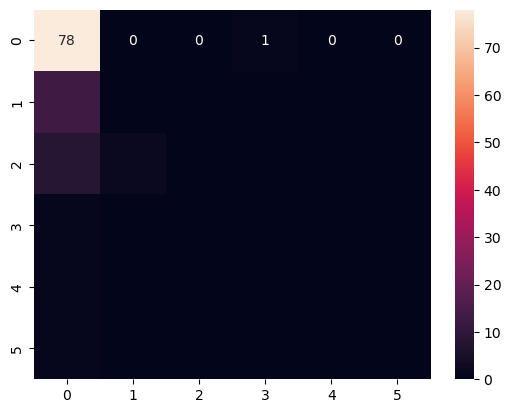

In [77]:
sns.heatmap(confusion_matrix(y_test,y_pred1),annot=True)

In [78]:
log_proba1 = log_model.predict_proba(x_test)[::,1]

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Parch


In [50]:
auc1 = roc_auc_score(y_test,log_proba)
auc1

0.8113517060367453

In [51]:
fpr1, tpr1, thr1 = roc_curve(y_test,log_proba)

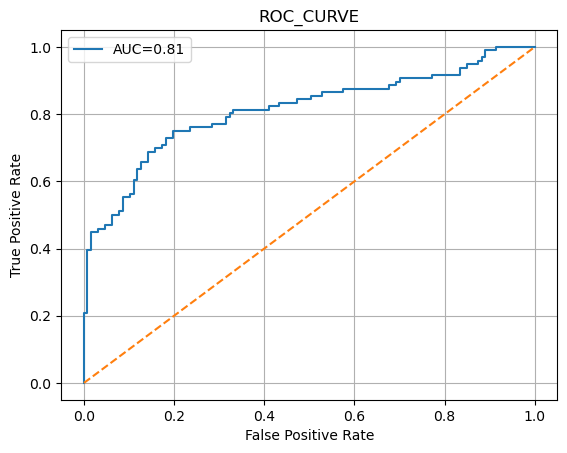

In [52]:
plt.plot(fpr1,tpr1,label=f'AUC={auc:.2}')
plt.plot([0,1],[0,1],linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_CURVE')
plt.legend()
plt.grid(True)